<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Adding new features
</font>
</h1>


<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Dataset
</font>
</h2>
<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
At first, we are going to read the <code>housing_no_outlier_full.csv</code> dataset file.</font>
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_no_outlier = pd.read_csv('../china_2_correct_format_and_outliers/housing_no_outlier.csv', encoding='gbk')
housing_no_outlier.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7


<br>
<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part One 
</font>
</h2>
<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
One of the interesting things that can be done in such analysis is to create a new feature based on the existing features. Of course this should be done under the condition that the new feature is considered a useful feature.
As the first step, we will calculate the distance of each house to the center of the Chinese capital and store it in a column named <code>distanceToCapital</code>.
The longitude (<code>longitude</code>) and latitude (<code>latitude</code>) of the center of the Chinese capital are <code>116.4074</code> and <code>39.9042</code> respectively.
We are going to use the formula below to calculate the distance.
Note that in the calculations, we must convert all angles to radians. We name the new dataframe that contains this column <code>housing_capital</code>.
<br>
<br>
</font>
</p>


$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [7]:
from math import radians

def diastance(row):
    dist = np.arccos((np.sin(capital_Lat) * np.sin(radians(row["Lat"]))) + (np.cos(capital_Lat) * np.cos(radians(row["Lat"])) * np.cos(radians(row["Lng"]) - capital_Lng))) * 6371.008
    return dist


capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)
housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] = housing_capital.apply(diastance, axis=1)
housing_capital.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074994
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701223
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293039
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683334
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914651


<br>
<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Two
</font>
</h2>
<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this dataset, the traded price and the size of each house are known. But the price per square meter of the house is not known. We are going to calculate and store the price per square meter of the house in the <code>pricePerSquare</code> column. Note that the total price is based on <i>million yuan</i>. So the price you calculate for each square meter of the house should be multiplied by a thousand to get the price based on <i>Yuan</i>. Set the resulting dataframe name to <code>housing_PPS</code>.</font>
</p>


In [9]:
housing_PPS = housing_capital.copy()
housing_PPS['pricePerSquare'] = housing_PPS.apply(lambda row: (row["totalPrice"] / row["square"]) * 1000, axis=1)
housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074994,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701223,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293039,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683334,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914651,5200.000000



<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
We want to extract information according to our needs by illustrating data in various ways. Our dataset has no missing values, no outliers, and no columns stored in the wrong format. In the first step, we take a look at the histogram of the numerical columns.<br>
</font>
</p>

C:\Users\USER\AppData\Local\Temp\ipykernel_17776\60454985.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 20);


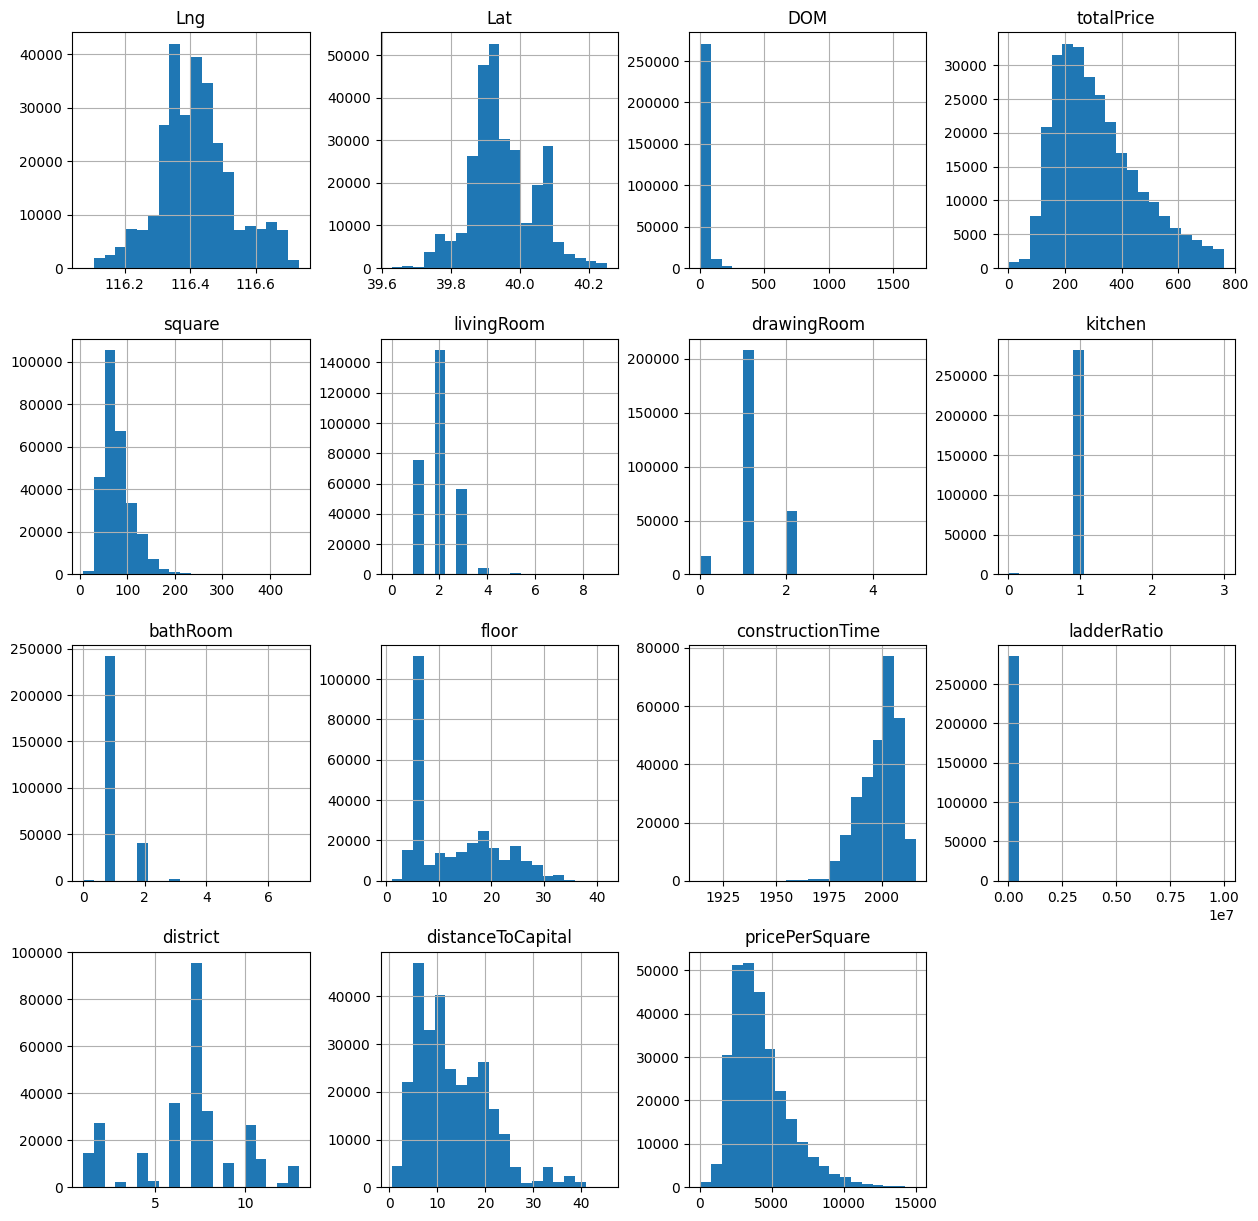

In [10]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
According to the chart above, the price of the house has a curve towards the price of 200 million yuan. Most of the houses were built around 2000. The longest distance from the center of the capital is 40 km. Most houses have two hall rooms. More information can be extracted from this chart.</font>
</p>


<br>
<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Examining the effect of the distance from the center on the price of each square meter</font>
</h2>


<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
We want to use the new column we created and see how the price per square meter of the house changes as we move away from the city center. For this, we can use Seaborn's <code>regplot</code> chart, which in addition to displaying points, shows the data trend with regression.
(The following cell may take several minutes to execute.)</font>
</p>

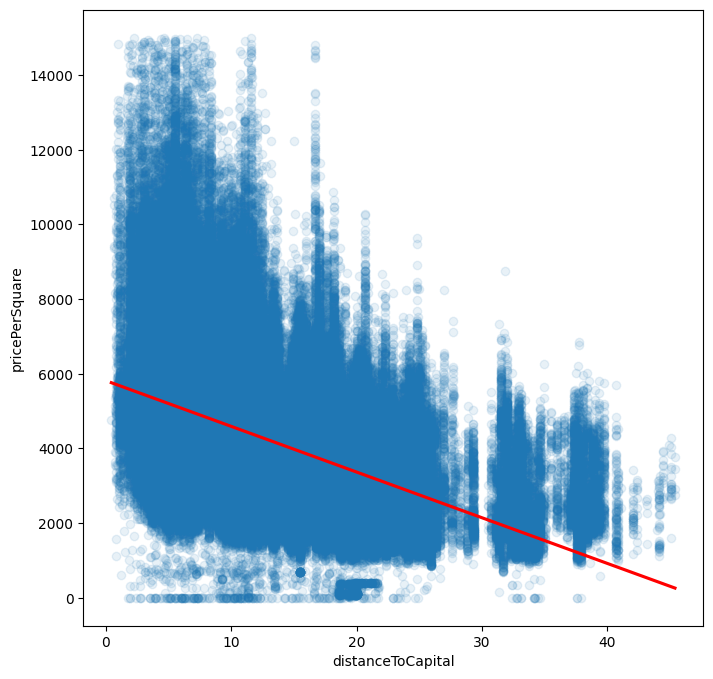

In [11]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)
sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

<br>
<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Three
</font>
</h2>
<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this section, we want to check how much have an elevator can affect on
<b>
 Price per square meter
</b>
. Different charts can be used for this. For example, with the help of a bar graph, we can compare the average price of houses with and without an elevator, or with the help of a box graph, you can draw a graph that shows the distribution of their prices. We use the density plot for comparison.<br>
</font>
</p>

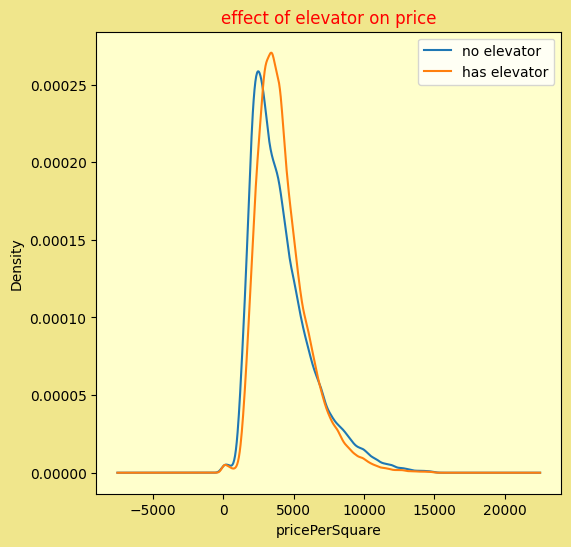

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
housing_PPS[housing_PPS["elevator"] == "no elevator"]["pricePerSquare"].plot(kind="kde", ax = ax, legend=True, label="no elevator")
housing_PPS[housing_PPS["elevator"] == "has elevator"]["pricePerSquare"].plot(kind="kde", ax = ax, legend=True, label="has elevator")
ax.set_title("effect of elevator on price", color="red")
ax.set_xlabel("pricePerSquare")
ax.set_facecolor("#ffffcc")
fig.set_facecolor("khaki")


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Finally, we are going to save the final dataframe in a file called <code>housing_extended.csv</code> to use in the next stages of the project.</font>
</p>

In [21]:
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)

<br>
<br>
<h2 style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>Saving cell</b>
</font>
</h2>


<p style="text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    Run the following cell to create the <code>result.zip</code> file. Note that before running the following cell, you have saved the changes applied to the netbook (<code>ctrl+s</code>).
</font>
</p>

In [22]:
import zipfile
import joblib
import nbformat as nbf

ntbk = nbf.read("3_add_new_features.ipynb", nbf.NO_CONVERT)
new_ntbk = ntbk
for cell in ntbk.cells:
    cell['outputs']=[]
nbf.write(new_ntbk, "3_add_new_features_no_output.ipynb", version=nbf.NO_CONVERT)

housing_capital.head(100).to_csv("housing_capital.csv") 
housing_PPS.head(100).to_csv("housing_PPS.csv")
joblib.dump(fig, "fig")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["housing_capital.csv", "housing_PPS.csv", "fig", '3_add_new_features_no_output.ipynb']
compress(file_names)

File Paths:
['housing_capital.csv', 'housing_PPS.csv', 'fig', '3_add_new_features_no_output.ipynb']
